# Projeto WPT - Grupo 2
Arthur Tamm, Caio Bôa, Gabriel Hermida e Pedro Civita

## Importando Bibliotecas

In [208]:
import numpy as np
from capacitor import Capacitor
from indutor import Indutor
import cmath
from numpy import sqrt, pi, linalg
import matplotlib.pyplot as plt

# Etapa 1

In [209]:
def freqResonancia(l, c):
    return 1/(2*pi*sqrt(l*c))

def CalcularTransformadorProjeto(v1, rc, r, l, k, c, f):
    w = 2*pi*f

    xl = w*l*1j
    xc = 1/(w*c*1j)
    m = k*l
    xm = m*w*1j
    
    Z=np.array([[r+xl+xc, -xm],[-xm, xl+r+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return I[0],I[1], V2

def real(zeq):
    return abs(zeq)*np.cos(cmath.phase(zeq))

def capacitorPelaFreqRes(freq, indutancia):
    return 1/(4*pi**2*freq**2*indutancia)

In [210]:
l  = 0.01
c = 1e-9

freqRes = freqResonancia(l, c)
print("Frequencia de ressonancia: ", freqRes)

v1 = 10

rc = 100
r = 1

k = 0.3
m = k*l

frequencies = np.arange(40000, 60000, 10)

values = {"i1": [], "i2": [], "v2": []}

Frequencia de ressonancia:  50329.21210448704


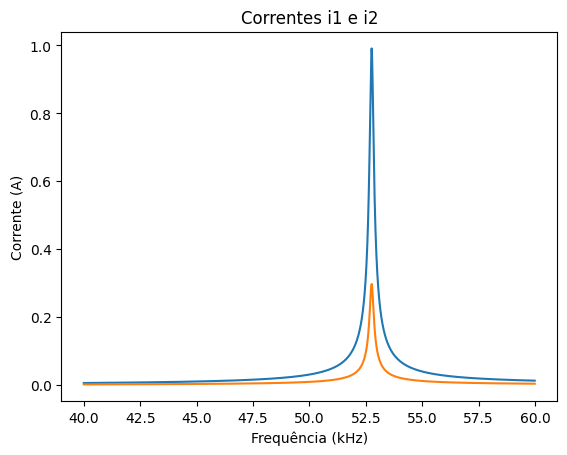

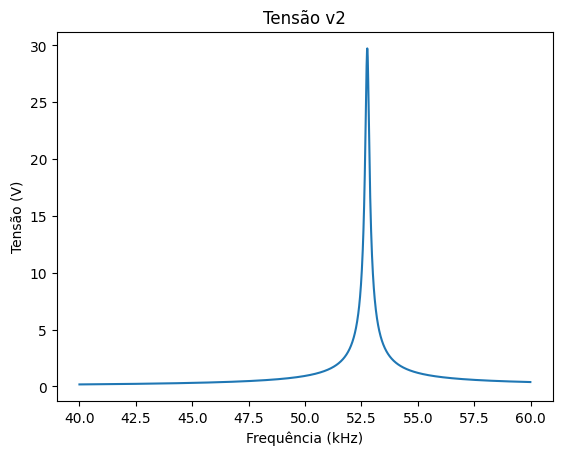

In [211]:
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"])

plt.title("Correntes i1 e i2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tensão v2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.show()



In [212]:
# Descobrindo o valor de frequência que causa correntes máximas
maximo = 0
for i in range(len(values['i1'])):
    if values['i1'][i] >= maximo:
        maximo = values['i1'][i]
        freq_max = frequencies[i]
freq_max

52760

4)

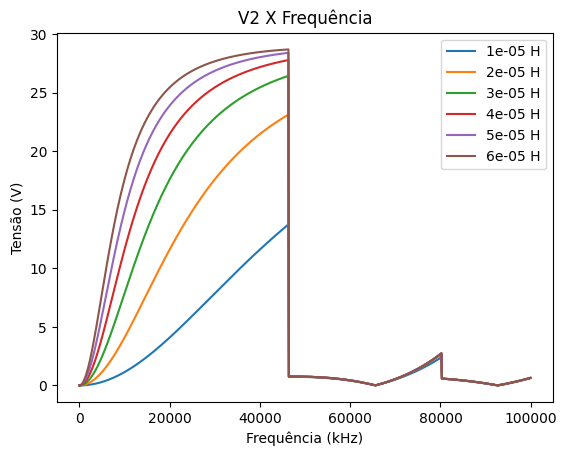

In [218]:
l_list = [100e-6, 200e-6, 300e-6, 400e-6, 500e-6, 600e-6]
# l2_list = [0.1, 0.5, 1, 5, 10, 50]
freqs = np.arange(10, 100000, 100)
k = 0.3
for l in l_list:
    v2_list = []
    m = k*l
    for f in freqs:
        c = capacitorPelaFreqRes(f, l)
        i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
        v2_list.append(abs(v2))
    plt.plot(freqs, v2_list, label=f"{l} H")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.title('V2 X Frequência')
plt.legend()
plt.show()



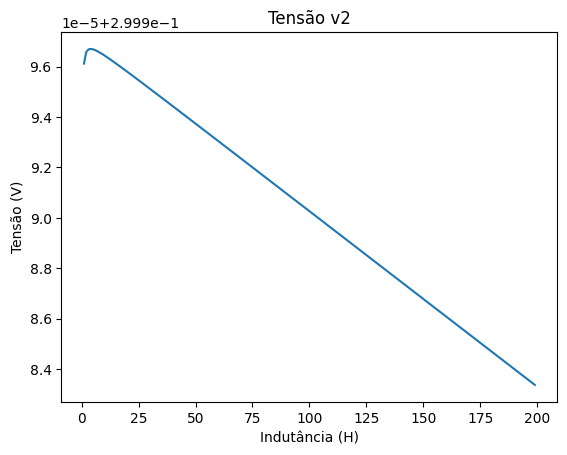

0.2999967031452364


In [214]:
l_list = np.arange(1, 200, 1)
v2_list = []

for i in range(len(l_list)):
    l = l_list[i]
    fr = freqResonancia(l, c)
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, fr)
    v2_list.append(v2)

plt.plot(l_list, v2_list)
plt.title("Tensão v2")
plt.xlabel("Indutância (H)")
plt.ylabel("Tensão (V)")
plt.show()

print(real(max(v2_list)))

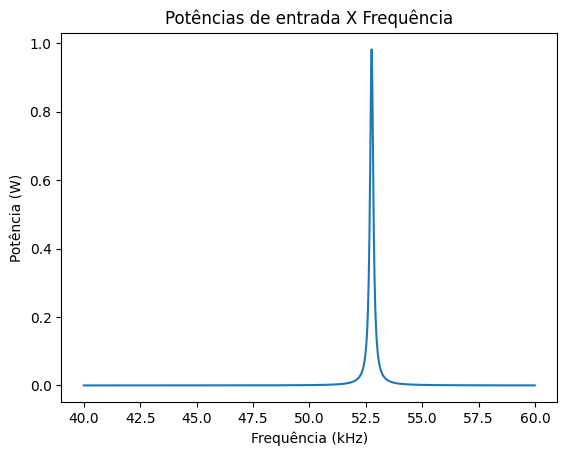

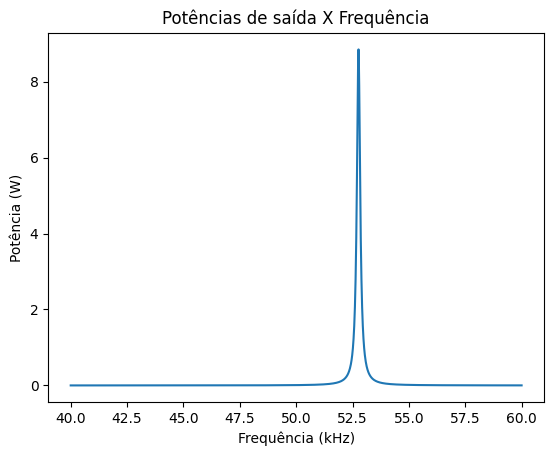

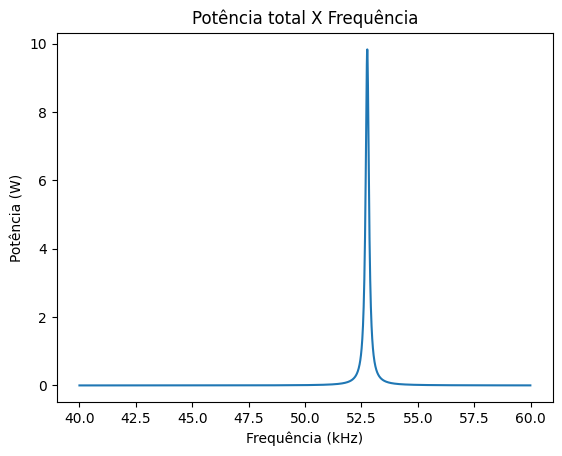

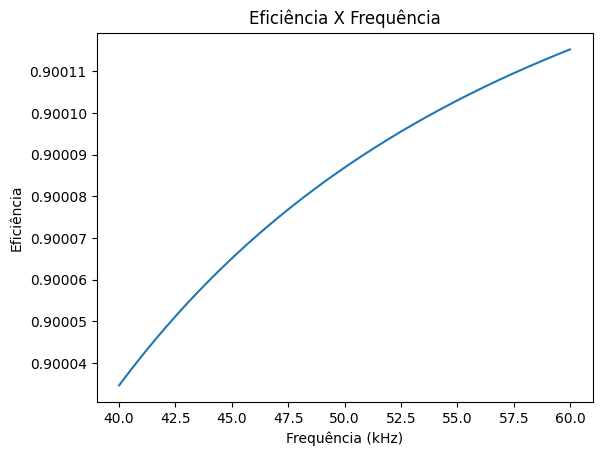

In [215]:
# Construção de gráficos das potências e da eficiência em função da frequência

# Potência de entrada
p1 = np.array(values["i1"])**2 * r

# Potência de saída
p2 = np.array(values["i2"])**2 * rc

# Potência total
pt = p1 + p2

# Eficiência
eff = p2/pt

plt.plot(frequencies/1e3, p1)
plt.title("Potências de entrada X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(frequencies/1e3, p2)
plt.title("Potências de saída X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(frequencies/1e3, pt)
plt.title("Potência total X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(frequencies/1e3, eff)
plt.title("Eficiência X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Eficiência")
plt.show()

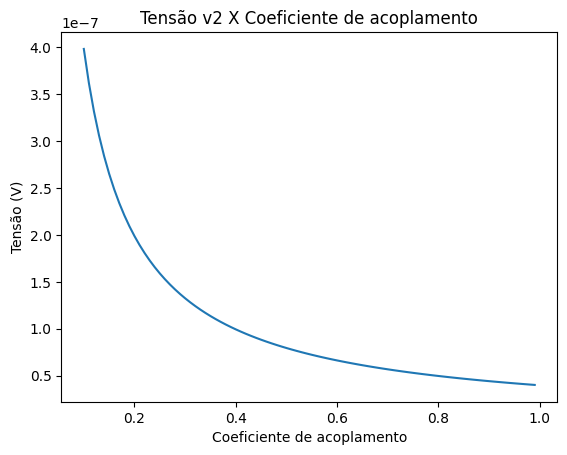

In [216]:
# Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶) como coeficiente de acoplamento 𝑘:

k_list = np.arange(0.1, 1, 0.01)
v2_list = []

for i in range(len(k_list)):
    k = k_list[i]
    m = k*l
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, freqRes)
    v2_list.append(v2)

plt.plot(k_list, v2_list)
plt.title("Tensão v2 X Coeficiente de acoplamento")
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão (V)")
plt.show()
